## Data Cleaning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from math import sqrt

df1 = pd.read_excel('Data_Train.xlsx')
df1 = pd.read_excel('Data_Train.xlsx',na_values=[np.nan])
# Dropping New_Price due to irreglar Data
df1 = df1.drop(['New_Price'],axis=1)
df1 = df1.dropna()
df1 = df1[df1['Engine'] != float]
df1 = df1[df1['Power'] != float]
Power = []
Engine = []
Mileage = []
for ind in df1.index:
    s = df1['Engine'][ind]
    p = df1['Power'][ind]
    m = df1['Mileage'][ind]
    if(m == '0.0 kmpl'):
        df1 = df1.drop(ind)
        continue
    if(type(s)!=float and type(p)!=float and type(m)!=float):
        s = s.rsplit(' CC',1)[0] 
        p = p.rsplit(' bhp',1)[0] 
        m = m.rsplit(' k',1)[0] 
    if(s == 'null'or p =='null' or m =='null'):
        df1 = df1.drop(ind)
        continue
    s = float(s)
    p = float(p)
    m = float(m)
    Engine.append(s)
    Power.append(p)
    Mileage.append(m)
df1 = df1.drop(['Engine'],axis=1)
df1['Engine(CC)']=Engine
df1 = df1.drop(['Power'],axis=1)
df1['Power(BHP)'] = Power
df1 = df1.drop(['Mileage'],axis=1)
df1['Mileage'] = Mileage
df1 = df1.dropna()
df1 = df1[df1['Engine(CC)'] != float]
df1 = df1[df1['Price']<100]
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Engine(CC),Power(BHP),Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,998.0,58.16,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,1582.0,126.20,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,1199.0,88.70,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,1248.0,88.76,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,1968.0,140.80,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,1248.0,74.00,28.40
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,1120.0,71.00,24.40
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,2498.0,112.00,14.00
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,998.0,67.10,18.90


# Simple Linear Regression Analysis
## x = Year y = Used Price

In [15]:
df2 = df1[['Year','Price']]
df2 = df2[df2['Price']<100]
X = df2['Year'].values.reshape(-1,1)
Y = df2['Price'].values.reshape(-1,1)

In [16]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X, Y)  #fit the model
    pred=model.predict(X) #make prediction on test set
    error = sqrt(mean_squared_error(Y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 24.280427483349268
RMSE value for k=  2 is: 13.919883837376437
RMSE value for k=  3 is: 12.346605448685052
RMSE value for k=  4 is: 11.276425411674452
RMSE value for k=  5 is: 10.962840457257679
RMSE value for k=  6 is: 10.979741820322747
RMSE value for k=  7 is: 10.831924884645504
RMSE value for k=  8 is: 10.675216319083255
RMSE value for k=  9 is: 10.762647122508001
RMSE value for k=  10 is: 10.630684454633062
RMSE value for k=  11 is: 10.541432672798596
RMSE value for k=  12 is: 10.610997978673883
RMSE value for k=  13 is: 10.555827514669797
RMSE value for k=  14 is: 10.520940632343875
RMSE value for k=  15 is: 10.519786981005817
RMSE value for k=  16 is: 10.494972347611366
RMSE value for k=  17 is: 10.45798984052612
RMSE value for k=  18 is: 10.407823060486043
RMSE value for k=  19 is: 10.418757810966374
RMSE value for k=  20 is: 10.433400751376752


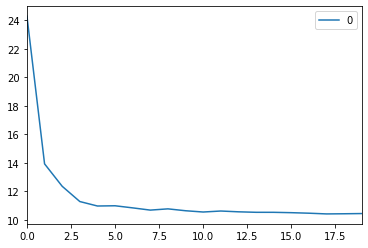

In [17]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#### When we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 7, the RMSE is approximately 24.28042, and shoots up on further increasing the k value. We can safely say that k=18 will give us the best result in this case.

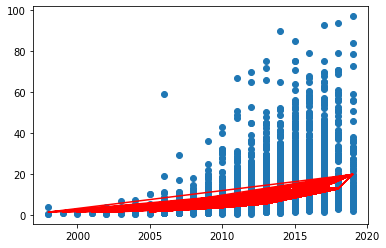

R2 value is: 0.08065734209634334


In [18]:
linear_regressor = neighbors.KNeighborsRegressor(n_neighbors = 18)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
r2 = linear_regressor.score(X,Y)
print("R2 value is:",r2)

### Test Output Here
Don't forget to execute the previous cell first

In [19]:
x_test = float(input("Enter a Year: "))
x_test = np.array(x_test)
# x_test = np.array(2010)
x_test = x_test.reshape(-1,1)
y_pred = linear_regressor.predict(x_test)
y_pred
print("Predicted Price is:",round(y_pred[0][0],2),"Lakh Rupees")

Enter a Year: 2010
Predicted Price is: 3.62 Lakh Rupees


## x = Kilometers_Driven y = used Price

In [25]:
df2 = df1[['Kilometers_Driven','Price']]
df2 = df2[df2['Kilometers_Driven']<250000]
df2 = df2[df2['Price']<100]
X = df2['Kilometers_Driven'].values.reshape(-1,1)
Y = df2['Price'].values.reshape(-1,1)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X, Y)  #fit the model
    pred=model.predict(X) #make prediction on test set
    error = sqrt(mean_squared_error(Y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 10.650529017320283
RMSE value for k=  2 is: 10.388002975074725
RMSE value for k=  3 is: 10.310091642212704
RMSE value for k=  4 is: 10.211209652860198
RMSE value for k=  5 is: 10.17953713941904
RMSE value for k=  6 is: 10.211119913639235
RMSE value for k=  7 is: 10.222903048555164
RMSE value for k=  8 is: 10.254147182398635
RMSE value for k=  9 is: 10.316670436535894
RMSE value for k=  10 is: 10.313986218217366
RMSE value for k=  11 is: 10.369391228362304
RMSE value for k=  12 is: 10.359504831894736
RMSE value for k=  13 is: 10.378791457153543
RMSE value for k=  14 is: 10.366507287812679
RMSE value for k=  15 is: 10.364159840342603
RMSE value for k=  16 is: 10.378382369000878
RMSE value for k=  17 is: 10.373667129643703
RMSE value for k=  18 is: 10.373045669971793
RMSE value for k=  19 is: 10.383826240905782
RMSE value for k=  20 is: 10.394368379956388


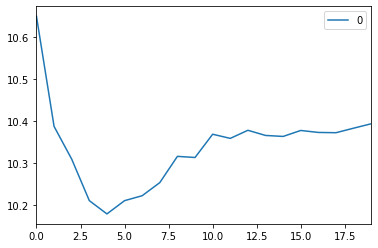

In [26]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#### When we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 5, the RMSE is approximately 10.17953, and shoots up on further increasing the k value. We can safely say that k=5 will give us the best result in this case.

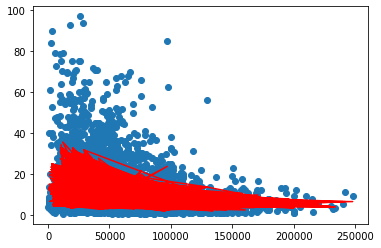

R2 value is: 0.11845431628725456


In [29]:
linear_regressor = neighbors.KNeighborsRegressor(n_neighbors = 5)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
r2 = linear_regressor.score(X,Y)
print("R2 value is:",r2)

### Test Output Here
Don't forget to execute the previous cell first

In [30]:
x_test = float(input("Enter kilometers driven: "))
x_test = np.array(x_test)
# x_test = np.array(2010)
x_test = x_test.reshape(-1,1)
y_pred = linear_regressor.predict(x_test)
y_pred
print("Predicted Price is:",round(y_pred[0][0],2),"Lakh Rupees")

Enter kilometers driven: 25000
Predicted Price is: 16.17 Lakh Rupees


## x = Engine_size, y=price

In [31]:
df2 = df1[['Engine(CC)','Price']]
X = df2['Engine(CC)'].values.reshape(-1,1)
Y = df2['Price'].values.reshape(-1,1)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X, Y)  #fit the model
    pred=model.predict(X) #make prediction on test set
    error = sqrt(mean_squared_error(Y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.933938868430042
RMSE value for k=  2 is: 7.610330583858837
RMSE value for k=  3 is: 6.834837127956643
RMSE value for k=  4 is: 6.846136943586058
RMSE value for k=  5 is: 6.8551637957077185
RMSE value for k=  6 is: 6.714620041955018
RMSE value for k=  7 is: 6.712628915673023
RMSE value for k=  8 is: 6.715007985364997
RMSE value for k=  9 is: 6.772547995662665
RMSE value for k=  10 is: 6.768635751310261
RMSE value for k=  11 is: 6.815340218292226
RMSE value for k=  12 is: 6.766590018746174
RMSE value for k=  13 is: 6.777669512453522
RMSE value for k=  14 is: 6.762908665617765
RMSE value for k=  15 is: 6.728852800099169
RMSE value for k=  16 is: 6.726649801044394
RMSE value for k=  17 is: 6.741447081740461
RMSE value for k=  18 is: 6.767776496889634
RMSE value for k=  19 is: 6.79821659698564
RMSE value for k=  20 is: 6.805308944735025


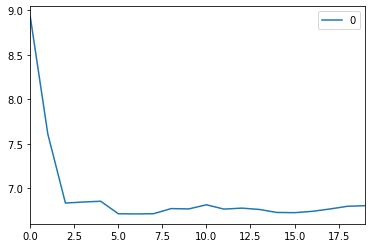

In [32]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#### When we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 2, the RMSE is approximately 7.61033, and shoots up on further increasing the k value. We can safely say that k=5 will give us the best result in this case.

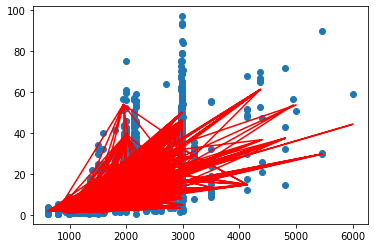

R2 value is: 0.508453445551025


In [33]:
linear_regressor = neighbors.KNeighborsRegressor(n_neighbors = 2)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
r2 = linear_regressor.score(X,Y)
print("R2 value is:",r2)

### Test Output Here
Don't forget to execute the previous cell first

In [34]:
x_test = float(input("Enter Engine Size in CC: "))
x_test = np.array(x_test)
# x_test = np.array(2010)
x_test = x_test.reshape(-1,1)
y_pred = linear_regressor.predict(x_test)
y_pred
print("Predicted Price is:",round(y_pred[0][0],2),"Lakh Rupees")

Enter Engine Size in CC: 1500
Predicted Price is: 6.28 Lakh Rupees


## x = Power, y=Price

In [37]:
df2 = df1[['Power(BHP)','Price']]
df2 = df2[df2['Power(BHP)'] != float]
df2 = df2[df2['Price']<100]
X = df2['Power(BHP)'].values.reshape(-1,1)
Y = df2['Price'].values.reshape(-1,1)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X, Y)  #fit the model
    pred=model.predict(X) #make prediction on test set
    error = sqrt(mean_squared_error(Y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.822055015366286
RMSE value for k=  2 is: 5.420899307526888
RMSE value for k=  3 is: 5.147087013011486
RMSE value for k=  4 is: 5.033436939085294
RMSE value for k=  5 is: 5.078333302705483
RMSE value for k=  6 is: 5.0508587177659745
RMSE value for k=  7 is: 5.077861935637729
RMSE value for k=  8 is: 5.119598569906819
RMSE value for k=  9 is: 5.166749097516938
RMSE value for k=  10 is: 5.221380981474782
RMSE value for k=  11 is: 5.223872054667394
RMSE value for k=  12 is: 5.257805087254922
RMSE value for k=  13 is: 5.277312509754174
RMSE value for k=  14 is: 5.328918261469817
RMSE value for k=  15 is: 5.334292009170034
RMSE value for k=  16 is: 5.34652605413064
RMSE value for k=  17 is: 5.377713968321276
RMSE value for k=  18 is: 5.380206735824126
RMSE value for k=  19 is: 5.392778517919751
RMSE value for k=  20 is: 5.407105049114124


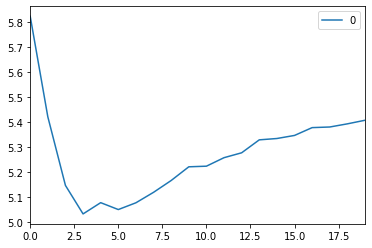

In [38]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#### When we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 4, the RMSE is approximately 5.033436, and shoots up on further increasing the k value. We can safely say that k=4 will give us the best result in this case.

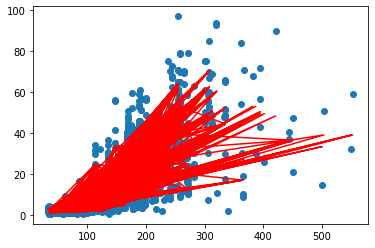

R2 value is: 0.7849760303494544


In [39]:
linear_regressor = neighbors.KNeighborsRegressor(n_neighbors = 4)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
r2 = linear_regressor.score(X,Y)
print("R2 value is:",r2)

### Test Output Here
Don't forget to execute the previous cell first

In [40]:
x_test = float(input("Enter Power in bhp: "))
x_test = np.array(x_test)
# x_test = np.array(2010)
x_test = x_test.reshape(-1,1)
y_pred = linear_regressor.predict(x_test)
y_pred
print("Predicted Price is:",round(y_pred[0][0],2),"Lakh Rupees")

Enter Power in bhp: 250
Predicted Price is: 27.88 Lakh Rupees
